## Titanic Competition

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone will survive in Titanic ship based on their features.

We're going to take the following approach:

**First**

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

**Second**
- EDA
- Build a dirty Model
- iterate
- Engineer features
- Get model that performs better

### 1. Problem Definition

> In titanic shipwreck, can we predict what sorts of people are more likely to survive? using passenger data

### 2. Data

we've got 3 datasets:

1. Train set: to train our model and find patterns in it.
2. Test set: to check the accuracy and performance of our model. 
3. Desired Output set: For reference.

### 3. Evaluation 

> If we can have 95% accuracy at predicting whether a person will survive or not in the Titanic shipwreck. Then, we'll considere the project as accomplished.

### 4. Features

> Data Description


**Survival**: 0 = No, 1 = Yes

**pclass (Ticket class)**: 1 = 1st, 2 = 2nd, 3 = 3rd

**sex**: Sex

**Age**: Age in years

**sibsp**: number of siblings/spouses aboard the Titanic

**parch**: number of parents/children aboard the Titanic

**ticket**: Ticket number

**fare**: Passenger fare

**cabin**: Cabin number

**embarked**: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

### Preparing the tools

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
#import catboost
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

here goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

**Load the data**

In [2]:
# Import train and test data
df_train = pd.read_csv("Desktop/sample_project_1/train.csv", index_col =0)
df_test = pd.read_csv("Desktop/sample_project_1/test.csv")
gender_submission = pd.read_csv("Desktop/sample_project_1/gender_submission.csv")

# View first lines of training data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Note on terminology**
- Target variable is the one we want to predict.
- Other features are known as features (or predicted variables)

In [3]:
# Viewing the features of dataset
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
#df_train.drop(['PassengerId'], axis=1, inplace=True)

- Categorical Features: Survived, Sex, Embarked
- Ordinal: Pclass
- Numerical Features: *Continuous*- Age, Fare. *Discrete*: SibSp, Parch

In [5]:
# View the test data set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [6]:
df_test.head(418)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- Use DataFrame `info()` method to know more about data types, shape, size of columns

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


- Use DataFrame.`decribe()` for summary statstics information.

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visual exploratory data analysis
- Using `seaborn` to build bar plot of Titanic Survival (your target variable)

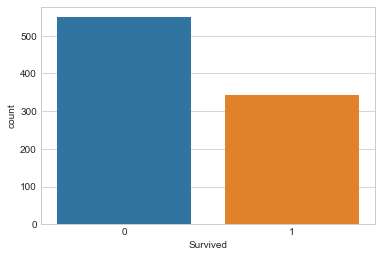

In [9]:
sns.countplot(x="Survived", data = df_train);

**Takeaways**
In Titanic train data set less people survived.
Let's create our first model of nobody survived as a baseline model. 

- Create `Survived` column from df_test set with people who didn't survived.
- Save PassendgerID and Survived column of df_test to a .csv and take as a baseline model.

### EDA in feature variables
- Build a bar plot for titanic train data set feature `Sex`

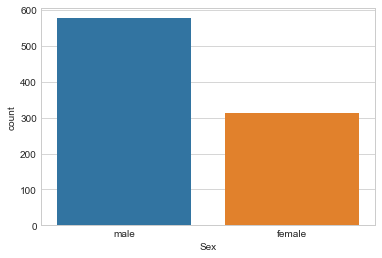

In [10]:
sns.countplot(x="Sex", data=df_train);

- Use `seaborn` to build bar plots of the titanic dataset feature 'Survived' split over the feature 'Sex'.

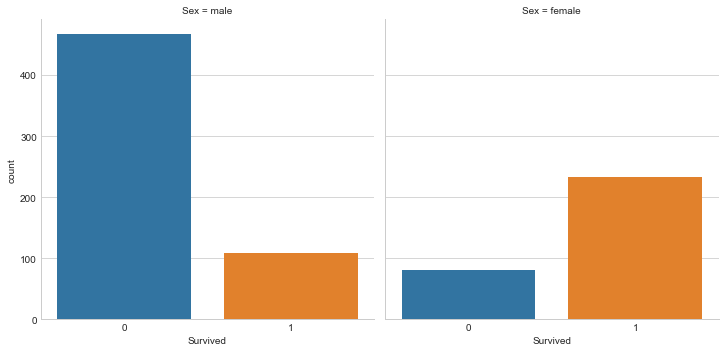

In [11]:
sns.factorplot(x= "Survived", col="Sex", kind="count", data=df_train);

**Take away**: Women are more likely to survive than man.

- Use `pandas` to figure out how many women and men survived

In [12]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [13]:
# Actual number of entries
df_train.groupby(["Sex"]).Survived.count()

Sex
female    314
male      577
Name: Survived, dtype: int64

- Use `pandas` to figure out percentage of men and women survived

In [14]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/ df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum() / df_train[df_train.Sex == 'male'].Survived.count())

0.7420382165605095
0.18890814558058924


**Take away**: 74% of women survived.
    
Now, let's build another model and predict all womens survived and mens didn't.

In [15]:
#df_test["Survived"] = df_test["Sex"] == 'female'
#df_test.head()

In [16]:
# Converting False and true into numbers with apply method
#df_test["Survived"] = df_test.Survived.apply(lambda x: int(x))
#df_test.Survived.head()

In [17]:
#df_test[["PassengerId", "Survived"]].to_csv("Desktop/sample_project_1/female-survivors.csv", index=False)

- Accuracy on kaggle?
76.5%

### Explore the data
EDA of other feature variables, categorical and numeric.

- Use `seaborn` to build bar plots of Titanic Dataset feature `Survived` split over the feature `Pclass`

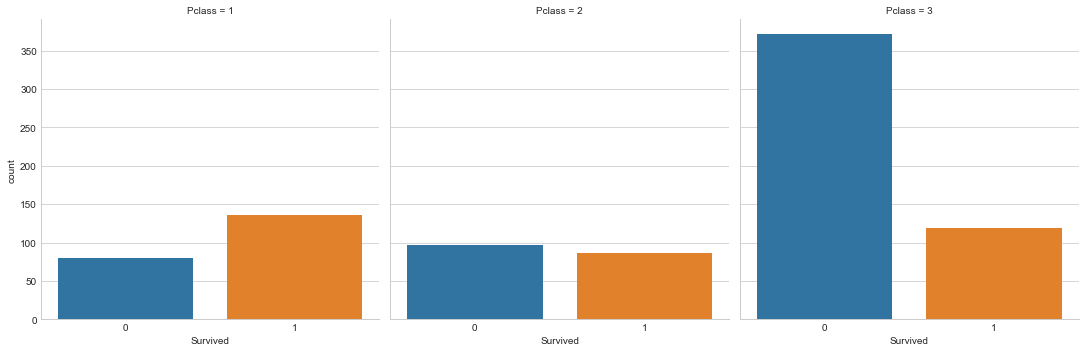

In [18]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data = df_train);

**Take-away**
- Pclass 1 passengers were more likely to survive. Whereas, Pclass 3 passengers were more unliikely to survive.|

Use `seaborn` to build bar plots of Titanic Dataset feature `Survived` split over the feature `Embarked`

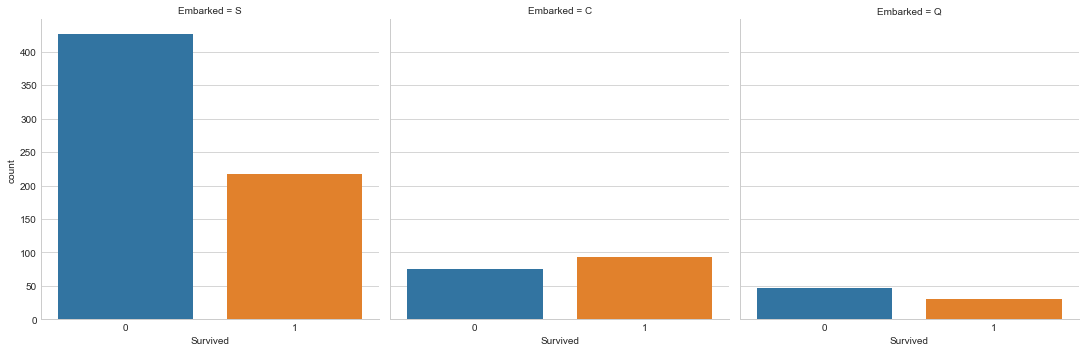

In [19]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data = df_train);

**Take-aways**
- Passesngers that embarked in 'C' Cherbourg are more likely to survive and Passengers that embarked in 'S' Southampton were less likely to survive.

### EDA with Numeric variables
- Numerical Features: *Continuous*- Age, Fare. *Discrete*: SibSp, Parch


- Use `seaborn` to plot a histogram of the `Fare` column of `df_train`

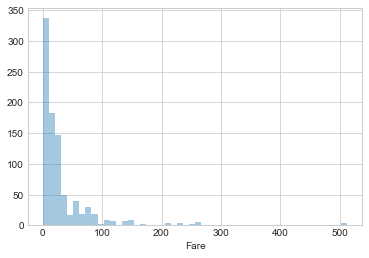

In [20]:
sns.distplot(df_train.Fare, kde=False);

**Take-away**
Most people paid less than 100 for travelling with the titanic

- Use `pandas` plotting method to plot the column `Fare` for rach value `Survived` on the same plot.

In [21]:
df_train.groupby('Survived').Fare.count()

Survived
0    549
1    342
Name: Fare, dtype: int64

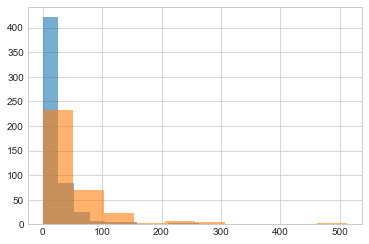

In [22]:
df_train.groupby('Survived').Fare.hist(alpha=0.6);

**Take away**
Passengers who paid more, had higher chance of surviving. 

- Use `seaborn` to plot a histogram of the `Age` column of the df_train.

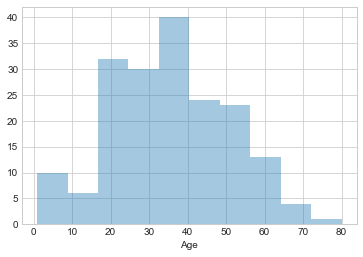

In [23]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

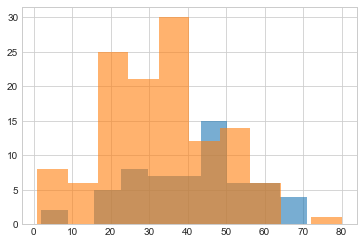

In [24]:
df_train_drop.groupby('Survived').Age.hist(alpha=0.6)

**Take-away**
Passenge within the age 20-40 survive more.

- Plot a strip plot & a swarm plot of `Fare` with `Survived` on the x-axis

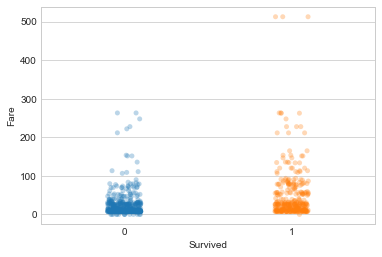

In [25]:
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

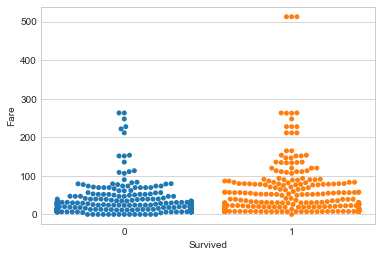

In [26]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);

**Take-away**
Fare seems to be correlated with survival aboard the Titanic

In [27]:
# Checking the summary stats of Fare
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


**Take-away**
Passengers who pay higher Fare were survived.

- Use `seaborn` to plot a scatter of `Age` against `Fare`, colored by `Survived`.

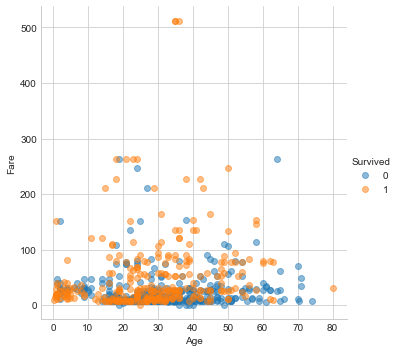

In [28]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5});

**Take-away**
Seems like those who survived either paid quite a bit for their ticket or they were young.

- Use `seaborn` to create a pairplot of `df_train`, colored by `'Survived'`. 

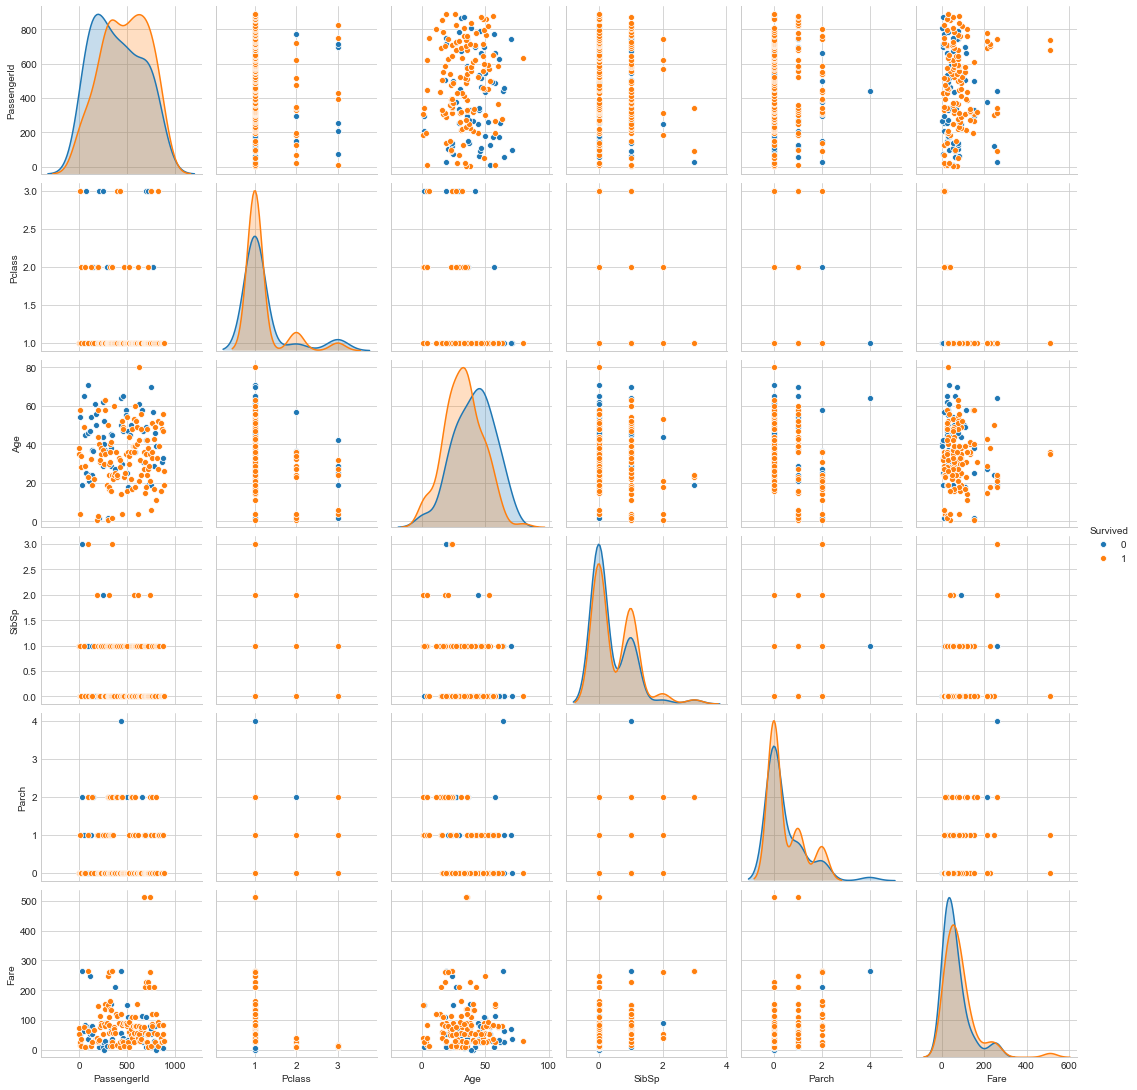

In [29]:
sns.pairplot(df_train_drop, hue='Survived');

- Check `correlation` between the features

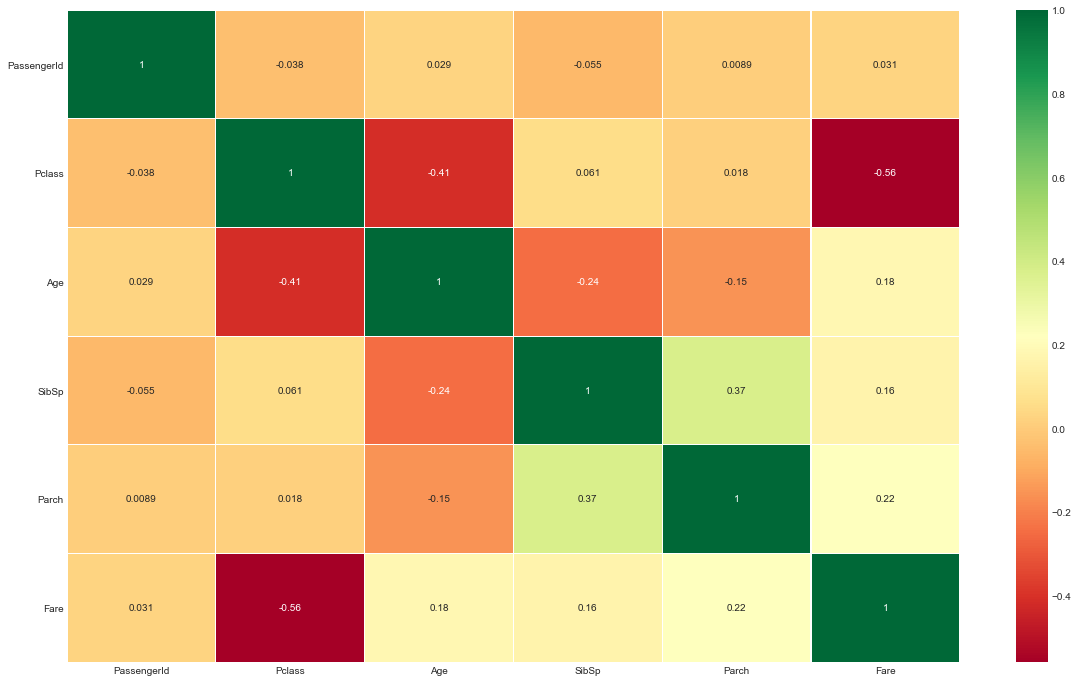

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Data Cleaning

In [31]:
# Store target variables of training data in safe place
# Preprocessing
survived_train = df_train.Survived

data= pd.concat([df_train.drop(["Survived"], axis=1), df_test])

np.random.seed(32)

- To check whther it has worked or not, check DataFrame.`info()`

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 97.2+ KB


**Identifying Missing Values**

In [35]:
missing_cols = [col for col in data
               if data[col].isnull().any()]

missing_cols

['Age', 'Fare', 'Cabin', 'Embarked']

In [36]:
# More than 75% of the values are missing in cabin. Hence, we will remove it.
drop_column = data['Cabin']
data.drop(['Cabin'], axis=1, inplace=True)

In [37]:
# Impute missing numerical values
data["Age"].fillna(data.Age.mean(), inplace=True)
data["Fare"].fillna(data.Fare.mean(), inplace=True)

# Impute missing categorical values
data["Embarked"].fillna(data.Embarked.mode()[0], inplace=True)

In [38]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 92.0+ KB


### Feature Engineering

In [40]:
# Checking the summary stats of Fare
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
# Creating a new feature named family size
for key,value in data.items():
    data['FamilySize'] = data['SibSp'].values + data['Parch'].values 
    
# create bin for fare features
for key,value in data.items():
    data['Fare_bin'] = pd.cut(data['Fare'].values,
                                 bins=[0,7.91,14.45,31,512.329200], 
                                 labels=['Low_fare','median_fare', 'Average_fare','high_fare'])

# create bin for age features
for key,value in data.items():
    data['Age_bin'] = pd.cut(data['Age'].values,
                                bins=[0,12,20,40,120],
                                labels=['Children','Teenage','Adult','Elder'])

In [42]:
# get all the unique values in the 'Country' column
names = data['Name'].unique()

# sort them alphabetically and then take a closer look
names.sort()
names

array(['Abbing, Mr. Anthony', 'Abbott, Master. Eugene Joseph',
       'Abbott, Mr. Rossmore Edward', ...,
       'van Billiard, Master. Walter John',
       'van Billiard, Mr. Austin Blyler', 'van Melkebeke, Mr. Philemon'],
      dtype=object)

In [43]:
# remove trailing white spaces
data['Name'] = data['Name'].str.strip()

# extract title
print("Extracting titles and adding column...")
data["Title"] = pd.DataFrame(data.apply(lambda x: x.Name.split(",")[1].split(".")[0], axis=1), columns=["Title"])

# Remove whitespace of title
data['Title'] = data['Title'].str.strip()

# Replacing values in a dataframe
data['Title'] = data['Title'].replace(['Don', 'Rev', 'Mrs', 'Major', 'Master', 'Dr', 'Lady', 'the Countess', 'Jonkheer', 'Dona', 'Capt', 'Col', 'Sir'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

data.head(2)

Extracting titles and adding column...


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Fare_bin,Age_bin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Low_fare,Adult,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,high_fare,Adult,Rare


In [44]:
# Check whether the cell above worked or not
data.Title.unique()

array(['Mr', 'Rare', 'Miss', 'Mrs'], dtype=object)

In [45]:
drop_columns = ['Age', 'Fare', 'Name', 'Ticket',]
data.drop(drop_columns, axis=1, inplace=True)

In [46]:
# Filling missing values
data['Fare_bin'] = data['Fare_bin'].fillna(method='bfill', axis=0)
data['PassengerId'] = data['PassengerId'].fillna(0)

In [47]:
data.isnull().sum().sum()

0

In [48]:
data = pd.get_dummies(data, columns=['Sex', 'Age_bin', 'Embarked', 'Fare_bin', 'Title'], prefix=['Sex', 'Age_type', 'Em_type', 'Fare_type', 'T_'])
data.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Age_type_Children,Age_type_Teenage,Age_type_Adult,...,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare,T__Miss,T__Mr,T__Mrs,T__Rare
0,1,3,1,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
1,2,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,3,3,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,4,1,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,5,3,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


### 5. Modelling

- Select the columns ['Sex_male', 'Fare', 'Age', 'Pcalss', 'SibSp'] from your DataFrame to build your first machine learning model

In [49]:
data.columns

Index(['PassengerId', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'Sex_female',
       'Sex_male', 'Age_type_Children', 'Age_type_Teenage', 'Age_type_Adult',
       'Age_type_Elder', 'Em_type_C', 'Em_type_Q', 'Em_type_S',
       'Fare_type_Low_fare', 'Fare_type_median_fare', 'Fare_type_Average_fare',
       'Fare_type_high_fare', 'T__Miss', 'T__Mr', 'T__Mrs', 'T__Rare'],
      dtype='object')

In [50]:
data_1 = data
data_1.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Age_type_Children,Age_type_Teenage,Age_type_Adult,...,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare,T__Miss,T__Mr,T__Mrs,T__Rare
0,1,3,1,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
1,2,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,3,3,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,0,0
3,4,1,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,5,3,0,0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


- Use `info()` to our data out `data`

In [51]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PassengerId             1309 non-null   int64
 1   Pclass                  1309 non-null   int64
 2   SibSp                   1309 non-null   int64
 3   Parch                   1309 non-null   int64
 4   FamilySize              1309 non-null   int64
 5   Sex_female              1309 non-null   uint8
 6   Sex_male                1309 non-null   uint8
 7   Age_type_Children       1309 non-null   uint8
 8   Age_type_Teenage        1309 non-null   uint8
 9   Age_type_Adult          1309 non-null   uint8
 10  Age_type_Elder          1309 non-null   uint8
 11  Em_type_C               1309 non-null   uint8
 12  Em_type_Q               1309 non-null   uint8
 13  Em_type_S               1309 non-null   uint8
 14  Fare_type_Low_fare      1309 non-null   uint8
 15  Fare_type_median_fare 

In [52]:
data_train = data_1.iloc[:891]
data_test = data_1[891:]

In [53]:
survived_train.values[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [54]:
# Create X and y variable
X = data_train.values
test = pd.DataFrame(data_test.values)
y = survived_train.values

In [55]:
test.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [56]:
# Put models in a dictionary
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "LinearSVC": LinearSVC(),
          "GaussianNB": GaussianNB(),
          "Linear Regression": LinearRegression(),
          "SGDClassifier": SGDClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "RandomForestClassifier": RandomForestClassifier(n_estimators=100)
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
  
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

array([[294,   3,   0, ...,   0,   0,   0],
       [618,   3,   1, ...,   0,   0,   1],
       [425,   3,   1, ...,   1,   0,   0],
       ...,
       [311,   1,   0, ...,   0,   0,   0],
       [556,   1,   0, ...,   1,   0,   0],
       [728,   3,   0, ...,   0,   0,   0]], dtype=int64)

In [58]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7877094972067039,
 'KNN': 0.5418994413407822,
 'LinearSVC': 0.7318435754189944,
 'GaussianNB': 0.7877094972067039,
 'Linear Regression': 0.36655173630920357,
 'SGDClassifier': 0.6089385474860335,
 'DecisionTreeClassifier': 0.7541899441340782,
 'RandomForestClassifier': 0.8156424581005587}

### Model Comparison


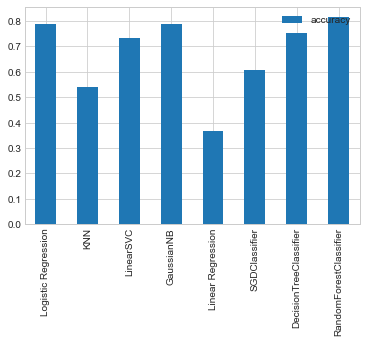

In [59]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

- `RandomForestClassifier` has highest accuracy of 83%

In [60]:
np.random.seed(42)

# Instantiate and fit the model
clf = RandomForestClassifier()
clf.fit(X,y)

# Make predictions
y_preds = clf.predict(test)
df_test['Survived'] = y_preds

In [61]:
df_test[["PassengerId", "Survived"]].to_csv("Desktop/sample_project_1/baselinemodel.csv", index=False)

- Kaggle score?
77%